In [80]:
#import modules needed to handle data and encoding
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

class Model:
    def __init__(self, datafile,target):
        #inicialization class object, and also creating the target dataset
        self.df = pd.read_csv(datafile)
        self.y=self.df[target]
        encoder = LabelEncoder()
        encoder.fit(self.y)
        new_data = encoder.transform(self.y)
        new_data.reshape(-1,1)
        self.y=new_data
        
        
    
    
    #create data frame with features, drop columns which are unnecessary or are target
    def create_X(self, column):
        self.X = self.df.drop(columns=column)
    
    #function which normalize categories number; for more than 4 categories in one column 
    #it calculates percentage value and for less than 5.5% category name is replaced with 'other'
    def categories_normalization(self):
        for column in self.X.columns:
            if self.X[column].nunique()>4:
                cat = self.X[column].unique()
                number_for_cat = self.X[column].value_counts()
                data_len = len(self.X[column])
                list_to_replace = []
                for i in range(len(cat)):
                    cat_in_perc = round(number_for_cat[i]/data_len*100, 2)
                    if cat_in_perc <= 5.5:
                        list_to_replace.append(cat[i])
                    else:
                        pass
                self.X[column].replace(to_replace=list_to_replace, value='other', inplace=True)
            else:
                pass

    #function which takes data frame, column name and scaler name and return data frame 
    #with encoded column using specified scaler        
    def data_scaler(self, column_header, scaler_name):
        column = np.array(self.X[column_header]).reshape(-1,1)
        scaler = scaler_name()
        scaler.fit(column)
        new_data = scaler.transform(column)
        self.X[column_header + "_scal"] = pd.Series(new_data[:,0])
        self.X.drop(columns=column_header, inplace=True)
    
    #function which takes data frame, column name and encoder name and return data frame 
    #with encoded column using specified encoder
    def data_encoder(self, encoding_function_name):
        for column in self.X.columns:
            if encoding_function_name==OneHotEncoder:
                column_ = np.array(self.X[column]).reshape(-1,1)
                encoder = encoding_function_name(sparse=False)
                encoder.fit(column_)
                categories = encoder.categories_
                new_data = encoder.transform(column_)
                for i in range(len(categories[0])):
                    self.X[column + "_" + categories[0][i]] = pd.Series(new_data[:,i])
                self.X.drop(columns=column, inplace=True)
            elif encoding_function_name==LabelEncoder:
                column_ = self.X[column]
                encoder = encoding_function_name()
                encoder.fit(column_)
                new_data = encoder.transform(column_)
                new_data.reshape(-1,1)
                self.X[column + "_enc"] = pd.Series(new_data)
                self.X.drop(columns=column, inplace=True)
            elif encoding_function_name==OrdinalEncoder:
                column_ = np.array(self.X[column]).reshape(-1,1)
                encoder = encoding_function_name()
                encoder.fit(column_)
                new_data = encoder.transform(column_)
                self.X[column + "_enc"] = pd.Series(new_data[:,0])
                self.X.drop(columns=column, inplace=True)
            else:
                print("Encoder is not specified in function")
    

    #function for chossing type of model and inicialization of model
    def choose_model(self,model_type=None):
        if model_type=='rf':
            self.user_defined_model = RandomForestClassifier(oob_score=True)
        elif model_type=='lg':
            self.user_defined_model = LogisticRegression(random_state=42)
        elif model_type=='svc':
            self.user_defined_model = SVC(kernel='rbf')
        elif model_type=='dt':
            self.user_defined_model = DecisionTreeClassifier(max_depth=4 , min_samples_leaf=3)
        elif model_type=='knn':
            self.user_defined_model = KNeighborsClassifier(n_neighbors=2,leaf_size=20, algorithm='kd_tree',p=1)
        else:
            self.user_defined_model = RandomForestClassifier(oob_score=True)
    

    #function which split the target and features into test and training datasets, as inputs it get target, features and test_size
    def split(self, test_size):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size = test_size, random_state = 42, shuffle=True)

    #function for training model, which takes the training datasets
    def fit(self):
        self.model = self.user_defined_model.fit(self.X_train, self.y_train)
        
    
    #function for predictions, takes the test datasets
    def predict(self):
        self.result = self.model.predict(self.X_test)
        #return result
    
    #checking score of chosen model for test data
    def score(self):
        m_score_train= self.model.score(self.X_train,self.y_train)
        m_score_test = self.model.score(self.X_test, self.y_test)
        return print( f"Accuracy score for train set is {m_score_train}" + "\n" + f"Accuracy score for test set is {m_score_test}")
    

    #fucntion which added the rest function used for modeling, fit, predict and score - run one function instead of 3
    def run_model(self):
        self.fit()
        self.predict()
        self.score()

 #function for confusion matrix and  classification report
    def matrix(self):
        conf_matrix=confusion_matrix(self.y_test,self.result)
        class_report=classification_report(self.y_test,self.result)
        sns.heatmap(confusion_matrix(self.y_test, self.result), annot = True)
        return print(f"Confuction matrix: \n {conf_matrix} \nClassification report: \n{class_report}")


Accuracy score for train set is 1.0
Accuracy score for test set is 1.0
Confuction matrix: 
 [[843   0]
 [  0 782]] 
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



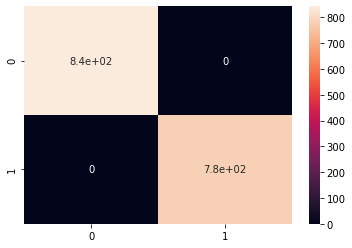

In [81]:
#Random forest model
model_rf=Model("mushrooms.csv","class")
model_rf.create_X(["class", "gill-attachment", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
                      "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "spore-print-color"])
model_rf.categories_normalization()
model_rf.data_encoder(OneHotEncoder)
model_rf.choose_model('rf')
model_rf.split(0.2)
#model_rf.fit()
#model_rf.predict()
#model_rf.score()

model_rf.run_model()
model_rf.matrix()

Accuracy score for train set is 0.9980654238480479
Accuracy score for test set is 0.9983593109105825
Confuction matrix: 
 [[1257    0]
 [   4 1177]] 
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



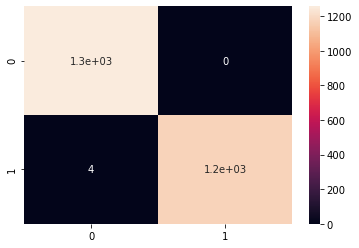

In [82]:
#Logistic regression model
model_lr=Model("mushrooms.csv","class")
model_lr.create_X(["class", "gill-attachment", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
                      "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "spore-print-color"])
model_lr.categories_normalization()
model_lr.data_encoder(OneHotEncoder)
model_lr.choose_model('lg')
model_lr.split(0.3)
#model_lr.fit()
#model_lr.predict()
#model_lr.score()

model_lr.run_model()
model_lr.matrix()

Accuracy score for train set is 1.0
Accuracy score for test set is 1.0
Confuction matrix: 
 [[1257    0]
 [   0 1181]] 
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



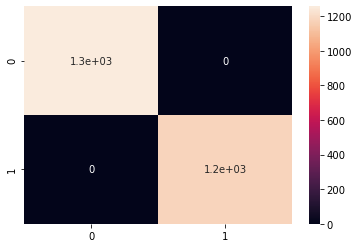

In [83]:
#SVC rbf model
model_svc=Model("mushrooms.csv","class")
model_svc.create_X(["class", "gill-attachment", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
                      "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "spore-print-color"])
model_svc.categories_normalization()
model_svc.data_encoder(OneHotEncoder)
model_svc.choose_model('svc')
model_svc.split(0.3)
#model_svc.fit()
#model_svc.predict()
#model_svc.score()

model_svc.run_model()
model_svc.matrix()

Accuracy score for train set is 0.9996482588814632
Accuracy score for test set is 0.9987694831829368
Confuction matrix: 
 [[1257    0]
 [   3 1178]] 
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



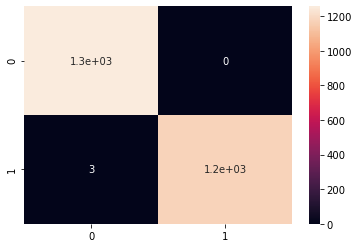

In [84]:
#KNN  model
model_knn=Model("mushrooms.csv","class")
model_knn.create_X(["class", "gill-attachment", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
                      "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "spore-print-color"])
model_knn.categories_normalization()
model_knn.data_encoder(OneHotEncoder)
model_knn.choose_model('knn')
model_knn.split(0.3)
#model_knn.fit()
#model_knn.predict()
#model_knn.score()

model_knn.run_model()
model_knn.matrix()

Accuracy score for train set is 0.9887442842068238
Accuracy score for test set is 0.9901558654634947
Confuction matrix: 
 [[1254    3]
 [  21 1160]] 
Classification report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1257
           1       1.00      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



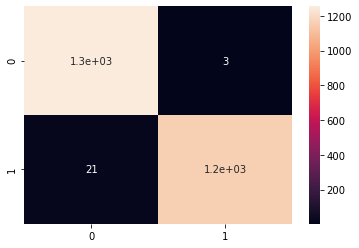

In [85]:
#Decision Tree  model
model_dt=Model("mushrooms.csv","class")
model_dt.create_X(["class", "gill-attachment", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", 
                      "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "spore-print-color"])
model_dt.categories_normalization()
model_dt.data_encoder(OneHotEncoder)
model_dt.choose_model('dt')
model_dt.split(0.3)
#model_dt.fit()
#model_dt.predict()
#model_dt.score()

model_dt.run_model()
model_dt.matrix()